Stroke Prediction Dataset7

In [1]:
import pandas as pd

df=pd.read_csv("D:/Medium/2 Learned/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv")
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [2]:
df.drop("id", axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


We can also see that we only have missing data in the body mass index column, being a small amount we can get rid of those rows.

In [3]:
df.dropna(subset=["bmi"], inplace=True)

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


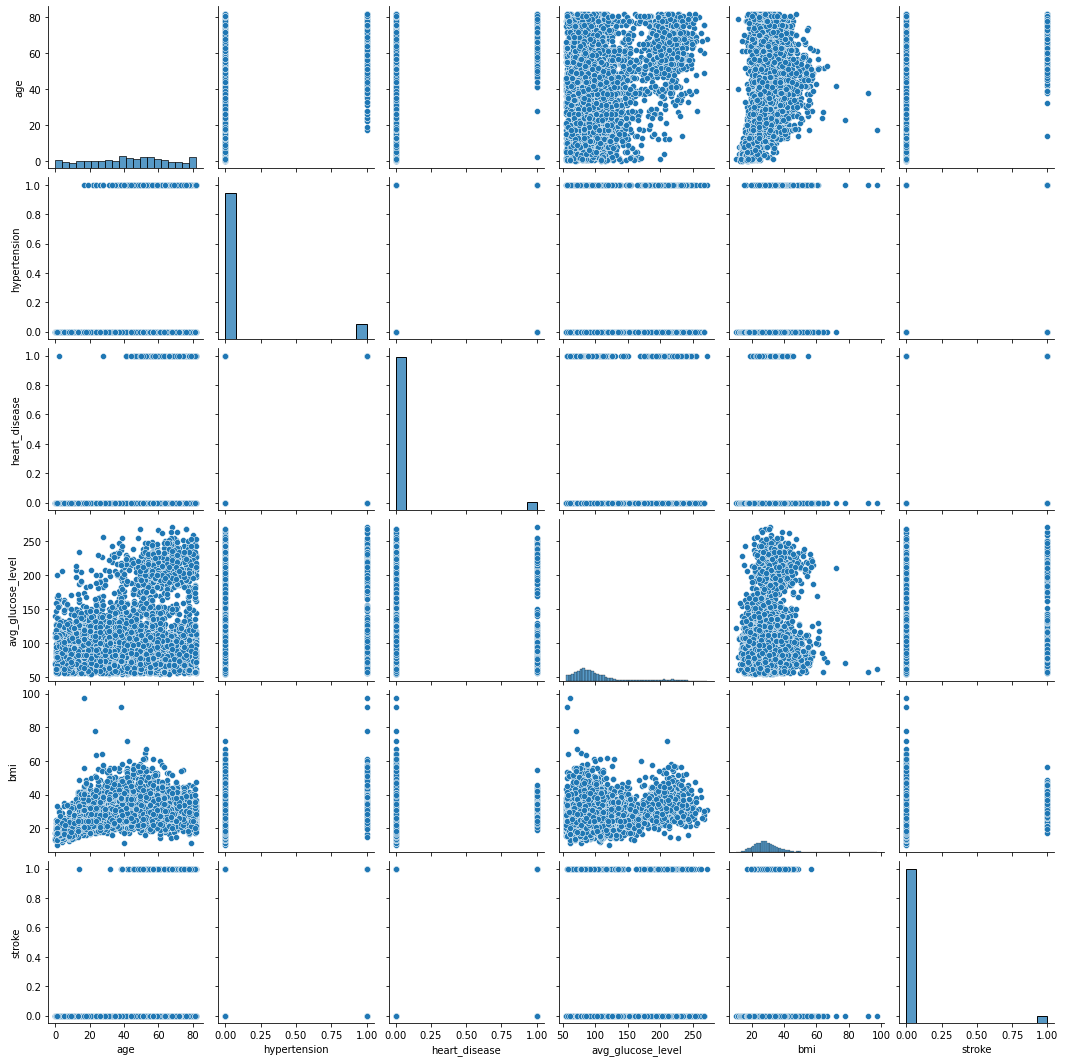

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.pairplot(df)
plt.show()

Visualizing The Distribution of The Data

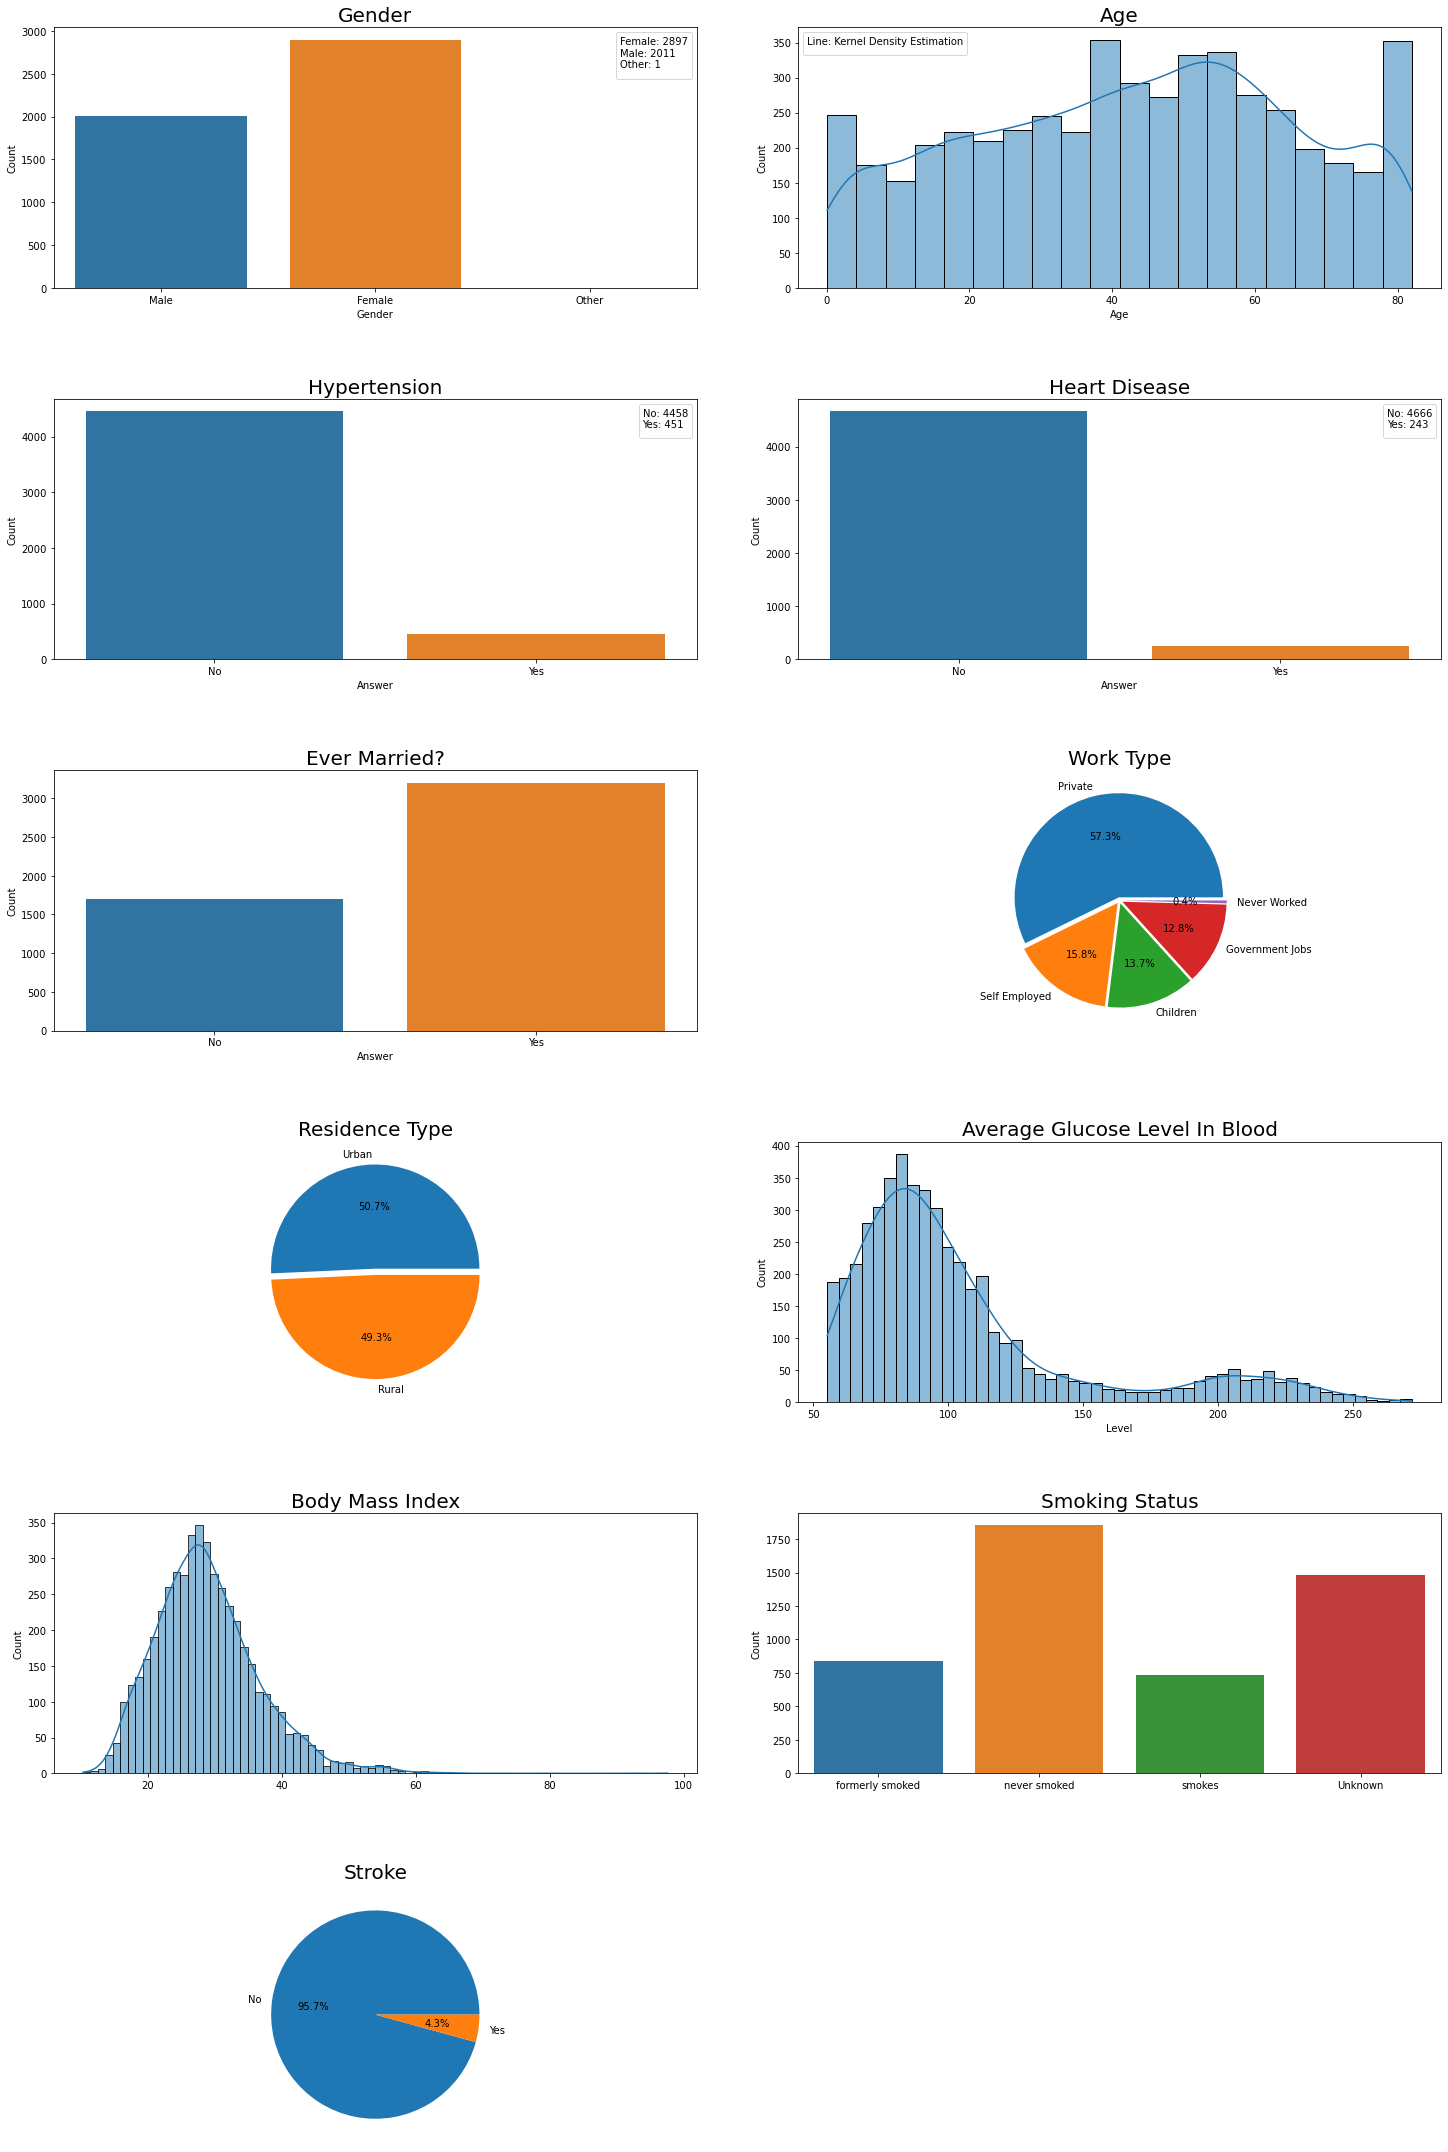

In [6]:
fig, ax=plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
fig.tight_layout(h_pad=9, w_pad=7)

sns.countplot(x=df.gender, ax=ax[0][0])
info_text="Female: "+str(df.gender.value_counts().Female)+"\nMale: "+str(df.gender.value_counts().Male)+"\nOther: "+str(df.gender.value_counts().Other)
ax[0][0].legend(title=info_text, labels=[])
ax[0][0].set_xlabel("Gender")
ax[0][0].set_ylabel("Count")
ax[0, 0].set_title("Gender", fontsize=20)

sns.histplot(df.age, ax=ax[0, 1], kde=True)
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Count")
ax[0, 1].set_title("Age", fontsize=20)
plt.sca(ax[0, 1])
plt.legend(labels=[], title="Line: Kernel Density Estimation")

sns.countplot(x=df.hypertension, ax=ax[1, 0])
plt.sca(ax[1, 0])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.hypertension.value_counts()[0])+"\nYes: "+str(df.hypertension.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 0].set_xlabel("Answer")
ax[1, 0].set_ylabel("Count")
ax[1, 0].set_title("Hypertension", fontsize=20)

sns.countplot(x=df.heart_disease, ax=ax[1, 1])
plt.sca(ax[1, 1])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.heart_disease.value_counts()[0])+"\nYes: "+str(df.heart_disease.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 1].set_xlabel("Answer")
ax[1, 1].set_ylabel("Count")
ax[1, 1].set_title("Heart Disease", fontsize=20)

sns.countplot(x=df.ever_married, ax=ax[2, 0], order=["No", "Yes"])
ax[2, 0].set_xlabel("Answer")
ax[2, 0].set_ylabel("Count")
ax[2, 0].set_title("Ever Married?", fontsize=20)

plt.sca(ax[2, 1])
ax[2, 1].set_title("Work Type", fontsize=20)
df.work_type.value_counts().index
renamed_labels=['Private', 'Self Employed', 'Children', 'Government Jobs', 'Never Worked']
plt.pie(x=df.work_type.value_counts(), labels=renamed_labels, autopct="%1.1f%%", 
        explode=df.work_type.nunique()*[.03])

plt.sca(ax[3, 0])
ax[3, 0].set_title("Residence Type", fontsize=20)
df.Residence_type.value_counts().index
plt.pie(x=df.Residence_type.value_counts(), labels=df.Residence_type.value_counts().index, autopct="%1.1f%%", 
        explode=df.Residence_type.nunique()*[.03])

sns.histplot(x=df.avg_glucose_level, ax=ax[3, 1], kde=True)
ax[3, 1].set_title("Average Glucose Level In Blood", fontsize=20)
ax[3, 1].set_xlabel("Level")
ax[3, 1].set_ylabel("Count")

sns.histplot(x=df.bmi, kde=True, ax=ax[4, 0])
ax[4, 0].set_title("Body Mass Index", fontsize=20)
ax[4, 0].set_xlabel("")
ax[4, 0].set_ylabel("Count")

sns.countplot(x=df.smoking_status, ax=ax[4, 1])
plt.sca(ax[4, 1])
ax[4, 1].set_title("Smoking Status", fontsize=20)
ax[4, 1].set_xlabel("")
ax[4, 1].set_ylabel("Count")

plt.sca(ax[5, 0])
ax[5, 0].set_title("Stroke", fontsize=20)
plt.pie(x=df.stroke.value_counts(), labels=["No", "Yes"], autopct="%1.1f%%")

ax[5, 1].set_visible(False)

plt.show()

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
categorical_df=df.copy()
dictionary_of_encodes={}

for column in categorical_df.select_dtypes("object").columns:
    categorical_df[column]=categorical_df[column].astype("category") #Changing dtype.
    dictionary_of_encodes[column]=dict( enumerate(categorical_df[column].cat.categories ) ) #Saving the encoding dictionary.
    categorical_df[column]=categorical_df[column].cat.codes #Encoding the dataframe.
    
categorical_df.dtypes

gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object

In [9]:
categorical_df[["age", "avg_glucose_level", "bmi"]].describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


Creating Certain Ranges For Numeric Columns

In [10]:
categorical_df.age=pd.cut(x=categorical_df.age, bins=[x for x in range(0, 101, 10)])
categorical_df.avg_glucose_level=pd.cut(x=categorical_df.avg_glucose_level, bins=[x for x in range(55, 301, 20)])
categorical_df.bmi=pd.cut(x=categorical_df.bmi, bins=[x for x in range(10, 101, 10)])

for column in ["age", "avg_glucose_level", "bmi"]:
    dictionary_of_encodes[column]=dict( enumerate(categorical_df[column].cat.categories ) ) #Saving the encoding dictionary.
    categorical_df[column]=categorical_df[column].cat.codes

categorical_df[["age", "avg_glucose_level", "bmi"]]

,age,avg_glucose_level,bmi
0,6,8,2
2,7,2,2
3,4,5,2
4,7,5,1
5,8,6,1
...,...,...,...
5104,1,2,0
5106,8,3,2
5107,3,1,2
5108,5,5,1


Adjusting Training Data

Instead of doing an oversampling we will collect the same amount of data from people who had and did not have strokes in a totally random way, then a test will be done with the remaining data (despite having a large majority of test data from people that they did not have strokes, this process is being done with the intention of being able to see the precision of some classification algorithms).

In [11]:
categorical_df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [12]:
#Adjusting Train Data

type1indices=[]
type0indices=[]

for x in range(categorical_df.shape[0]):
    if categorical_df.stroke.iloc[x]==1:
        type1indices.append(x)
    else:
        type0indices.append(x)
        
import numpy as np

np.random.shuffle(type0indices)
np.random.shuffle(type1indices)

train_x=categorical_df.iloc[type0indices[0:101]+type1indices[0:101], 0:-1]
train_y=categorical_df.iloc[type0indices[0:101]+type1indices[0:101], -1]
val_x=categorical_df.iloc[type0indices[101:]+type1indices[101:], 0:-1]
val_y=categorical_df.iloc[type0indices[101:]+type1indices[101:], -1]

Classification By Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(random_state=1)
model.fit(train_x, train_y)
pred_y=model.predict(val_x)

pred_y

array([0.  , 0.28, 0.93, ..., 0.58, 0.77, 0.85])

Creation of a New Data Frame

In [14]:
comparing_results_df=pd.DataFrame(val_y) #Creating new DF.
comparing_results_df.columns=["actual"] 
comparing_results_df["pred"]=pred_y #Adding new column for predicted values.
comparing_results_df['pred'] = np.where(comparing_results_df['pred']<=np.mean(pred_y), 0, 1) #adjusting values by the obtained probability.

Decoding Values From Encoded Columns

In [15]:
results_df=pd.concat([val_x, comparing_results_df], axis=1).reset_index(drop=True)

for row_n in range(results_df.shape[0]):
    for column in dictionary_of_encodes.keys():
        results_df.loc[row_n, column]=dictionary_of_encodes[column][results_df.loc[row_n, column]]

Precision Display

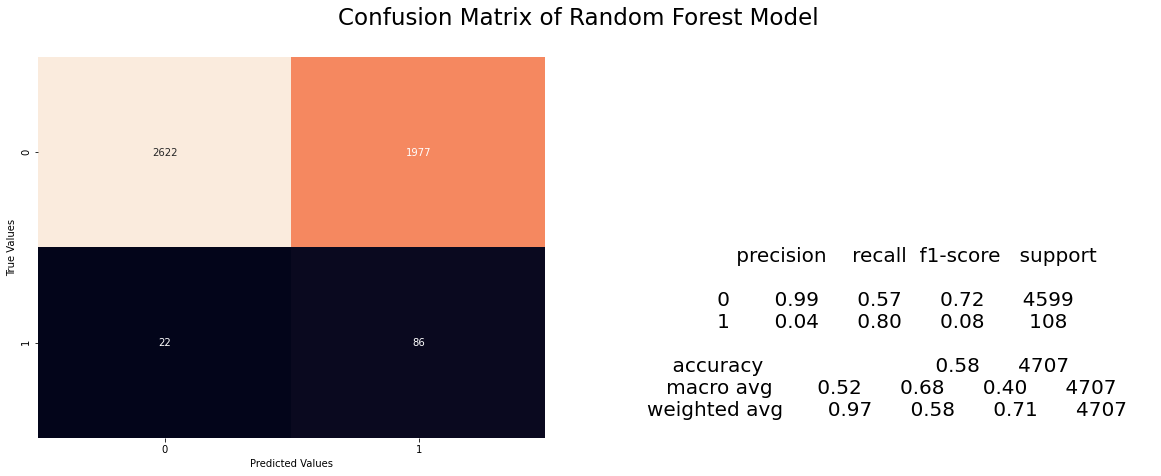

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,actual,pred
4687,Female,"(70, 80]",1,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,1
4688,Female,"(70, 80]",0,0,Yes,Private,Urban,"(55, 75]","(20, 30]",Unknown,1,1
4689,Female,"(80, 90]",1,0,Yes,Self-employed,Urban,"(195, 215]","(20, 30]",never smoked,1,1
4690,Female,"(50, 60]",0,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,1
4691,Female,"(70, 80]",0,0,Yes,Self-employed,Urban,"(55, 75]","(30, 40]",never smoked,1,1
4692,Female,"(50, 60]",0,0,Yes,Govt_job,Urban,"(55, 75]","(40, 50]",never smoked,1,0
4693,Male,"(70, 80]",0,1,Yes,Govt_job,Rural,"(215, 235]","(20, 30]",never smoked,1,1
4694,Male,"(80, 90]",0,0,Yes,Private,Urban,"(175, 195]","(20, 30]",formerly smoked,1,1
4695,Female,"(80, 90]",0,0,Yes,Private,Rural,"(55, 75]","(30, 40]",never smoked,1,1
4696,Female,"(70, 80]",0,0,Yes,Govt_job,Urban,"(115, 135]","(20, 30]",never smoked,1,0


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plotAndSaveConfusionMatrix(name_of_model, name_of_pic, actual_arr, pred_arr):
    confmat = confusion_matrix(actual_arr, pred_arr)
    fig, ax=plt.subplots(ncols=2, nrows=1, figsize=(20, 7))

    sns.heatmap(confmat, cbar=False, annot=True, fmt="g", ax=ax[0])
    plt.suptitle("Confusion Matrix of "+name_of_model+" Model", fontsize=23)
    plt.sca(ax[0])
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")

    ax[1].set_axis_off()
    ax[1].text(0, 0, classification_report(actual_arr, pred_arr), fontsize=20)
    plt.savefig(name_of_pic+'.png')
    plt.show()
    
plotAndSaveConfusionMatrix("Random Forest", "cm_rf", comparing_results_df['actual'], comparing_results_df['pred'])
results_df[results_df.actual==1].tail(n=20)

Classification By Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression 

model=LogisticRegression(max_iter=440)
model.fit(train_x, train_y)
pred_y=model.predict(val_x)
results_df.pred=pred_y

pred_y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Precision Display

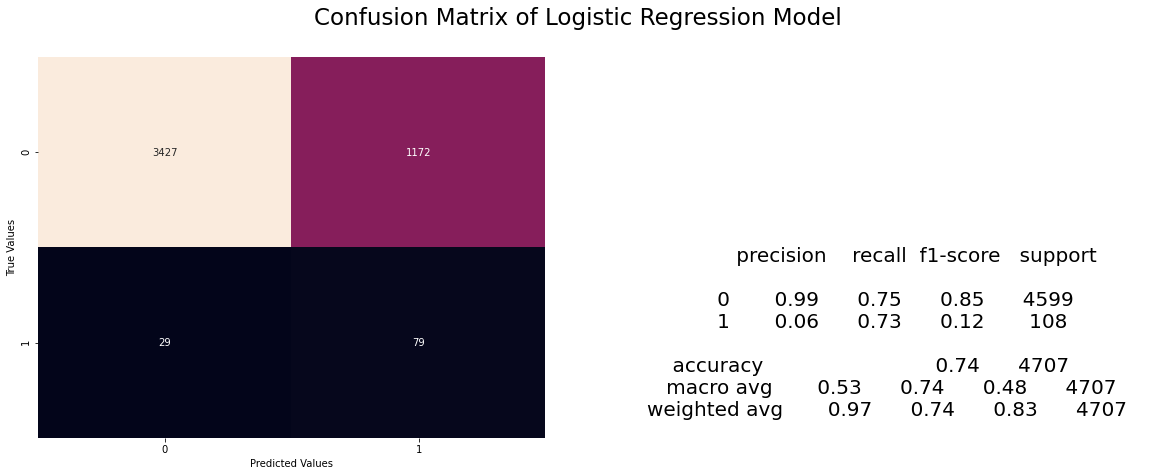

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,actual,pred
4687,Female,"(70, 80]",1,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,1
4688,Female,"(70, 80]",0,0,Yes,Private,Urban,"(55, 75]","(20, 30]",Unknown,1,1
4689,Female,"(80, 90]",1,0,Yes,Self-employed,Urban,"(195, 215]","(20, 30]",never smoked,1,1
4690,Female,"(50, 60]",0,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,0
4691,Female,"(70, 80]",0,0,Yes,Self-employed,Urban,"(55, 75]","(30, 40]",never smoked,1,1
4692,Female,"(50, 60]",0,0,Yes,Govt_job,Urban,"(55, 75]","(40, 50]",never smoked,1,0
4693,Male,"(70, 80]",0,1,Yes,Govt_job,Rural,"(215, 235]","(20, 30]",never smoked,1,1
4694,Male,"(80, 90]",0,0,Yes,Private,Urban,"(175, 195]","(20, 30]",formerly smoked,1,1
4695,Female,"(80, 90]",0,0,Yes,Private,Rural,"(55, 75]","(30, 40]",never smoked,1,1
4696,Female,"(70, 80]",0,0,Yes,Govt_job,Urban,"(115, 135]","(20, 30]",never smoked,1,1


In [18]:
plotAndSaveConfusionMatrix("Logistic Regression", "cm_lr", results_df['actual'], pred_y)
results_df[results_df.actual==1].tail(n=20)

Classification By Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB(alpha=1)
model.fit(train_x, train_y)
pred_y=model.predict(val_x)
results_df.pred=pred_y

pred_y

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

Precision Display

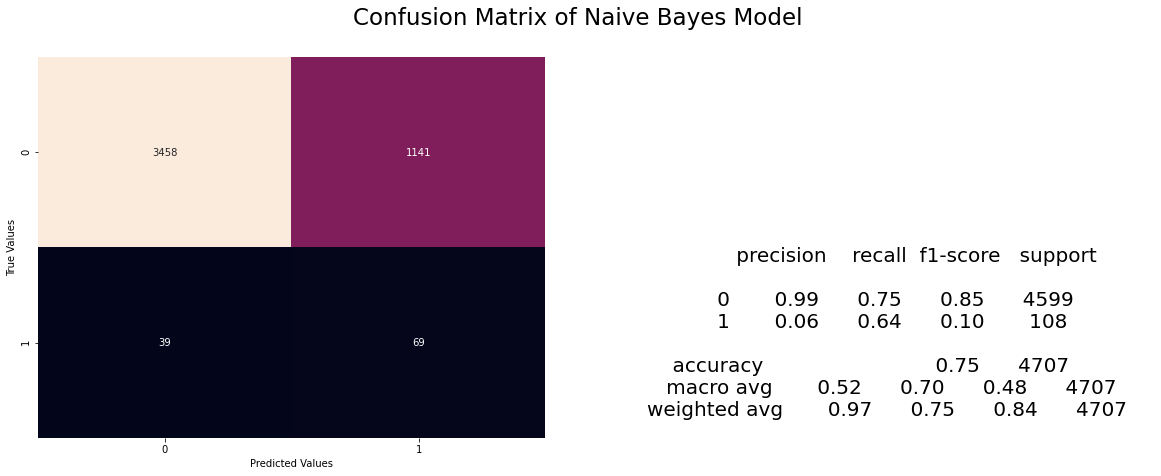

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,actual,pred
4687,Female,"(70, 80]",1,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,1
4688,Female,"(70, 80]",0,0,Yes,Private,Urban,"(55, 75]","(20, 30]",Unknown,1,0
4689,Female,"(80, 90]",1,0,Yes,Self-employed,Urban,"(195, 215]","(20, 30]",never smoked,1,1
4690,Female,"(50, 60]",0,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,0
4691,Female,"(70, 80]",0,0,Yes,Self-employed,Urban,"(55, 75]","(30, 40]",never smoked,1,0
4692,Female,"(50, 60]",0,0,Yes,Govt_job,Urban,"(55, 75]","(40, 50]",never smoked,1,0
4693,Male,"(70, 80]",0,1,Yes,Govt_job,Rural,"(215, 235]","(20, 30]",never smoked,1,1
4694,Male,"(80, 90]",0,0,Yes,Private,Urban,"(175, 195]","(20, 30]",formerly smoked,1,1
4695,Female,"(80, 90]",0,0,Yes,Private,Rural,"(55, 75]","(30, 40]",never smoked,1,0
4696,Female,"(70, 80]",0,0,Yes,Govt_job,Urban,"(115, 135]","(20, 30]",never smoked,1,1


In [20]:
plotAndSaveConfusionMatrix("Naive Bayes", "cm_nb", results_df['actual'], pred_y)
results_df[results_df.actual==1].tail(n=20)

Classification By K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

best_score=-1
best_n=-1

for x in range(1, 101):
    model=KNeighborsClassifier(n_neighbors=x)
    model.fit(train_x, train_y)
    pred_y=model.predict(val_x)
    
    score=np.sum(pred_y==val_y)/len(val_y)
    if score>best_score:
        best_score=score
        best_n=x
        
model=KNeighborsClassifier(n_neighbors=best_n)
model.fit(train_x, train_y)
pred_y=model.predict(val_x)
results_df.pred=pred_y

print(stats.describe(pred_y), "\nBest N: ",best_n, sep="")

DescribeResult(nobs=4707, minmax=(0, 1), mean=0.1406415976205651, variance=0.12088722107420015, skewness=2.0673487227352227, kurtosis=2.2739307413949588)
Best N: 2


Precision Display

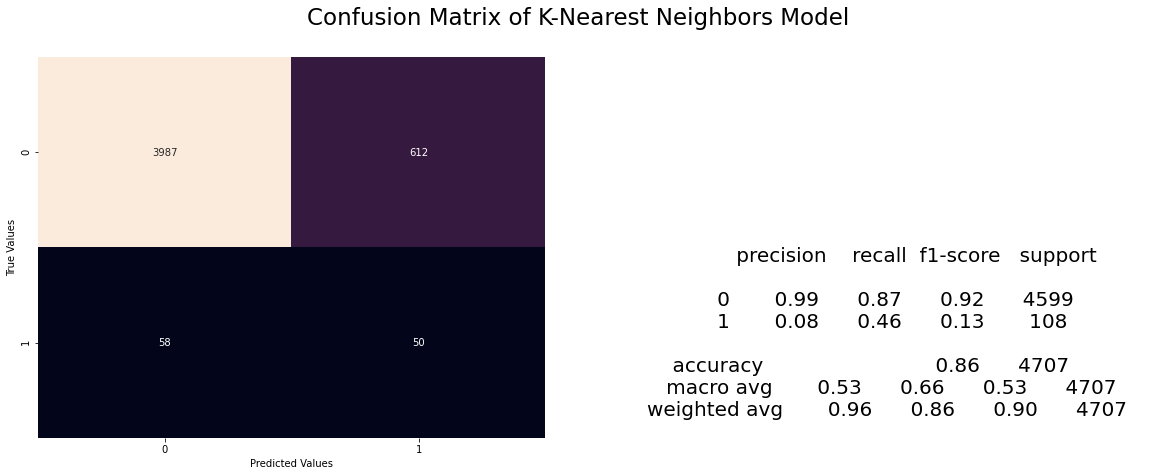

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,actual,pred
4687,Female,"(70, 80]",1,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,1
4688,Female,"(70, 80]",0,0,Yes,Private,Urban,"(55, 75]","(20, 30]",Unknown,1,0
4689,Female,"(80, 90]",1,0,Yes,Self-employed,Urban,"(195, 215]","(20, 30]",never smoked,1,1
4690,Female,"(50, 60]",0,0,Yes,Private,Rural,"(55, 75]","(20, 30]",formerly smoked,1,0
4691,Female,"(70, 80]",0,0,Yes,Self-employed,Urban,"(55, 75]","(30, 40]",never smoked,1,1
4692,Female,"(50, 60]",0,0,Yes,Govt_job,Urban,"(55, 75]","(40, 50]",never smoked,1,0
4693,Male,"(70, 80]",0,1,Yes,Govt_job,Rural,"(215, 235]","(20, 30]",never smoked,1,1
4694,Male,"(80, 90]",0,0,Yes,Private,Urban,"(175, 195]","(20, 30]",formerly smoked,1,1
4695,Female,"(80, 90]",0,0,Yes,Private,Rural,"(55, 75]","(30, 40]",never smoked,1,0
4696,Female,"(70, 80]",0,0,Yes,Govt_job,Urban,"(115, 135]","(20, 30]",never smoked,1,0


In [22]:
plotAndSaveConfusionMatrix("K-Nearest Neighbors", "cm_knb", results_df['actual'], pred_y)
results_df[results_df.actual==1].tail(n=20)

Visualization of The Precision of All The Algorithms Used

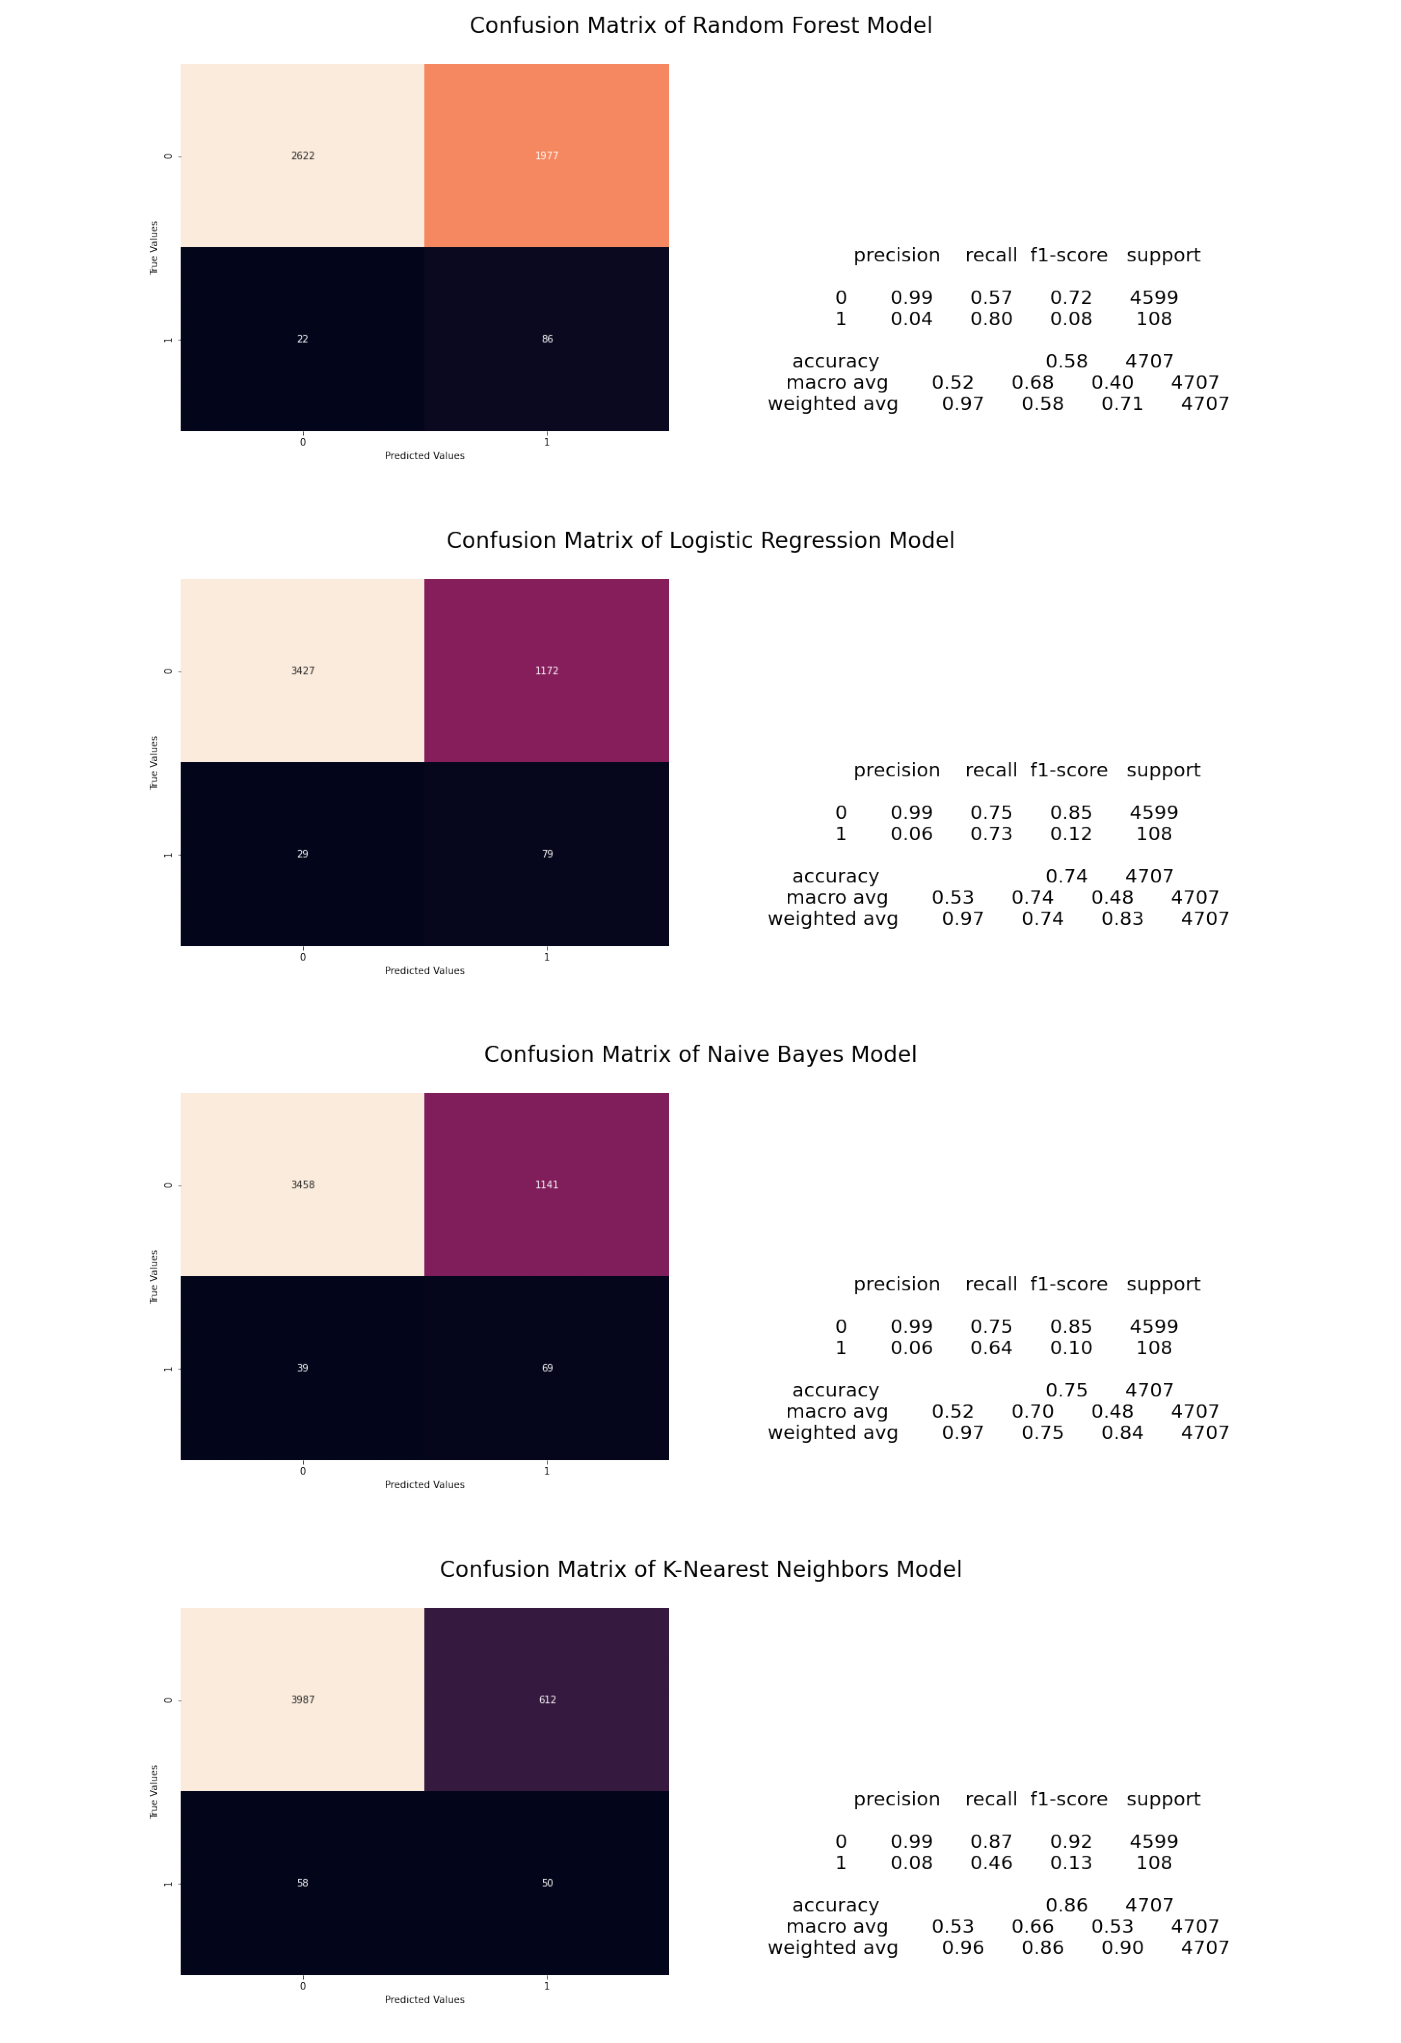

In [23]:
import matplotlib.image as mpimg

fig, ax=plt.subplots(nrows=4, ncols=1, figsize=(20, 40))
fig.tight_layout(h_pad=-80)

ax[0].imshow(mpimg.imread('cm_rf.png'))
ax[0].set_axis_off()

ax[1].imshow(mpimg.imread('cm_lr.png'))
ax[1].set_axis_off()

ax[2].imshow(mpimg.imread('cm_nb.png'))
ax[2].set_axis_off()

ax[3].imshow(mpimg.imread('cm_knb.png'))
ax[3].set_axis_off()